In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("city_day.csv")

data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [3]:
data.shape

(29531, 16)

In [4]:
data.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: >

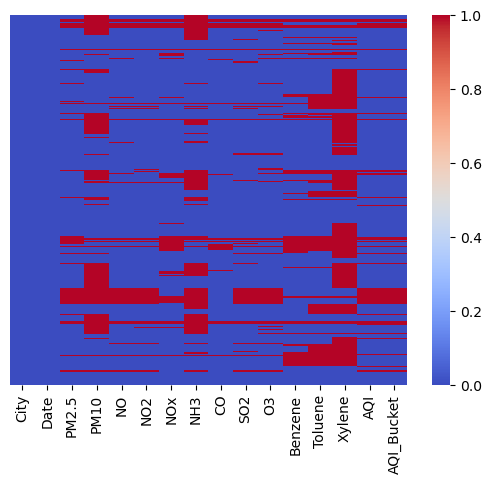

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="coolwarm")

In [8]:
data['BTX'] = data['Benzene']+data['Toluene']
data.drop(['Benzene','Toluene'],axis=1);

In [9]:
print(data.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'BTX'],
      dtype='object')


In [10]:
data.drop(["PM2.5", "NH3", "Xylene"], axis=1, inplace=True)

<Axes: >

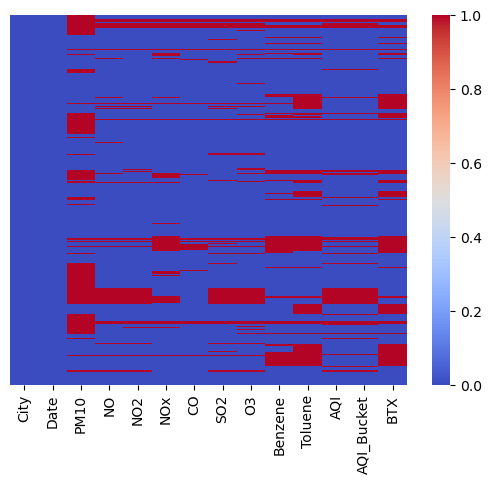

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="coolwarm")

In [12]:

numeric_columns = data.select_dtypes(include=['number'])
mean_values = numeric_columns.mean()

data[numeric_columns.columns] = numeric_columns.fillna(mean_values)


In [13]:
data.isnull().sum()

City             0
Date             0
PM10             0
NO               0
NO2              0
NOx              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    4681
BTX              0
dtype: int64

In [14]:
# Replace null values in object-type columns with the mode (most frequent value) of each column
for column in data.select_dtypes(include='object').columns:
    mode_value = data[column].mode()[0]  # Compute the mode value for the column
    data[column].fillna(mode_value, inplace=True)  # Replace null values with the mode value


In [15]:
data.isnull().sum()

City          0
Date          0
PM10          0
NO            0
NO2           0
NOx           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
BTX           0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
bucket = data['AQI_Bucket'].value_counts()
print(bucket)

AQI_Bucket
Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: count, dtype: int64


In [18]:
# Perform one-hot encoding using pandas' get_dummies() function
data = pd.get_dummies(data, columns=data.select_dtypes(include='object').columns)


In [19]:
data.isnull().sum()

PM10                       0
NO                         0
NO2                        0
NOx                        0
CO                         0
                          ..
AQI_Bucket_Moderate        0
AQI_Bucket_Poor            0
AQI_Bucket_Satisfactory    0
AQI_Bucket_Severe          0
AQI_Bucket_Very Poor       0
Length: 2052, dtype: int64

In [20]:
print(data.columns)

Index(['PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'AQI',
       ...
       'Date_2020-06-28', 'Date_2020-06-29', 'Date_2020-06-30',
       'Date_2020-07-01', 'AQI_Bucket_Good', 'AQI_Bucket_Moderate',
       'AQI_Bucket_Poor', 'AQI_Bucket_Satisfactory', 'AQI_Bucket_Severe',
       'AQI_Bucket_Very Poor'],
      dtype='object', length=2052)


In [21]:
X = data.drop(['AQI'],axis=1)  
y = data['AQI']

In [22]:
# model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 737.6484167777152


In [23]:
r2_=r2_score(y_test, y_pred)
print("R2 square:",r2_)

R2 square: 0.9510698556550814
